In [1]:
from preprocessing import load_all, shuffle_train
from lstm import createTrain

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# load datas
x_train, y_train, x_pred, y_pred, sc = load_all()

In [3]:
x_train, y_train = shuffle_train(x_train, y_train)
x_train.shape, y_train.shape

((1467, 20, 4), (1467,))

In [4]:
# train model
model = createTrain(x_train, y_train, ep=200)

Epoch 1/200
6/6 [==============================] - 2s 119ms/step - loss: 0.0052 - val_loss: 1.9694e-04
Epoch 2/200
6/6 [==============================] - 0s 32ms/step - loss: 5.3264e-04 - val_loss: 1.9312e-04
Epoch 3/200
6/6 [==============================] - 0s 32ms/step - loss: 5.7959e-04 - val_loss: 3.2344e-04
Epoch 4/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 5/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0013 - val_loss: 3.0210e-04
Epoch 6/200
6/6 [==============================] - 0s 31ms/step - loss: 8.7488e-04 - val_loss: 0.0011
Epoch 7/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0013 - val_loss: 3.3142e-04
Epoch 9/200
6/6 [==============================] - 0s 31ms/step - loss: 7.3402e-04 - val_loss: 6.1823e-04
Epoch 10/200
6/6 [==============================] - 0s 31ms/step - loss: 0.00

INFO:tensorflow:Assets written to: model/lstm/assets


INFO:tensorflow:Assets written to: model/lstm/assets


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 128)           68096     
_________________________________________________________________
dropout (Dropout)            (None, 20, 128)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                5152      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 73,281
Trainable params: 73,281
Non-trainable params: 0
_________________________________________________________________


In [5]:
# predict
res = model.predict(x_pred)
res

array([[0.33972692],
       [0.3454392 ],
       [0.35010415],
       [0.36885828],
       [0.36107206],
       [0.351306  ],
       [0.34240073],
       [0.35178894],
       [0.3602571 ],
       [0.37283713],
       [0.34961402],
       [0.34591952],
       [0.33081633],
       [0.3393702 ],
       [0.34002158],
       [0.3356283 ],
       [0.3230381 ],
       [0.32681596],
       [0.33295456],
       [0.3324216 ]], dtype=float32)

In [6]:
out = np.array( [res,]*4 ).transpose()
out = sc.inverse_transform( out[0] )
result = out[:,0]
result

array([151.38632, 151.93996, 152.39209, 154.20975, 153.4551 , 152.50858,
       151.64548, 152.55539, 153.37611, 154.59537, 152.34459, 151.98653,
       150.52272, 151.35176, 151.41489, 150.9891 , 149.76884, 150.135  ,
       150.72997, 150.6783 ], dtype=float32)

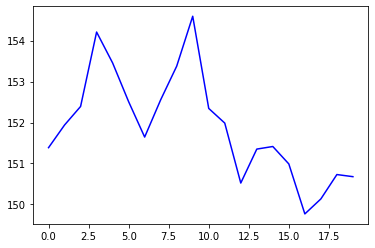

In [7]:
x = np.arange(20)
plt.plot(x, result, 'b')
plt.show()

In [8]:
state = 0
actions = []
for i in range(19):
    if result[i+1] > result[i] and state == 0:
        actions.append(1)
        state = 1
    elif result[i+1] < result[i] and state == 1:
        actions.append(-1)
        state = 0
    elif result[i+1] < result[i] and state == 0:
        actions.append(-1)
        state = -1
    elif result[i+1] > result[i] and state == -1:
        actions.append(1)
        state = 0
    else:
        actions.append(0)
actions = pd.DataFrame(actions)

In [9]:
actions.to_csv('action.csv', index=False, header=False)